In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from glob import glob 
import os
import warnings
warnings.filterwarnings("ignore")


# Importación de la data

In [17]:
df = pd.read_csv(r'C:\Users\andi_\Desktop\proy-big-data\mxmh_survey_results.csv')


# Edades de los entrevistados

In [14]:
y=df.groupby('Age').count().Timestamp # cantidad de respuestas por edad
x=df.groupby('Age').count().reset_index().Age # edades

In [ ]:
#Top 10 de frecuencia de respuestas por edad
df.groupby('Age').count().sort_values(by='Timestamp',ascending=False).Timestamp.head(10)

In [ ]:
plt.bar(x,y)
plt.title('Cantidad de respuestas por edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# ¿Cuáles son las enfermedades de salud mental más presentes según la edad?


# Crear un gráfico de barras apiladas




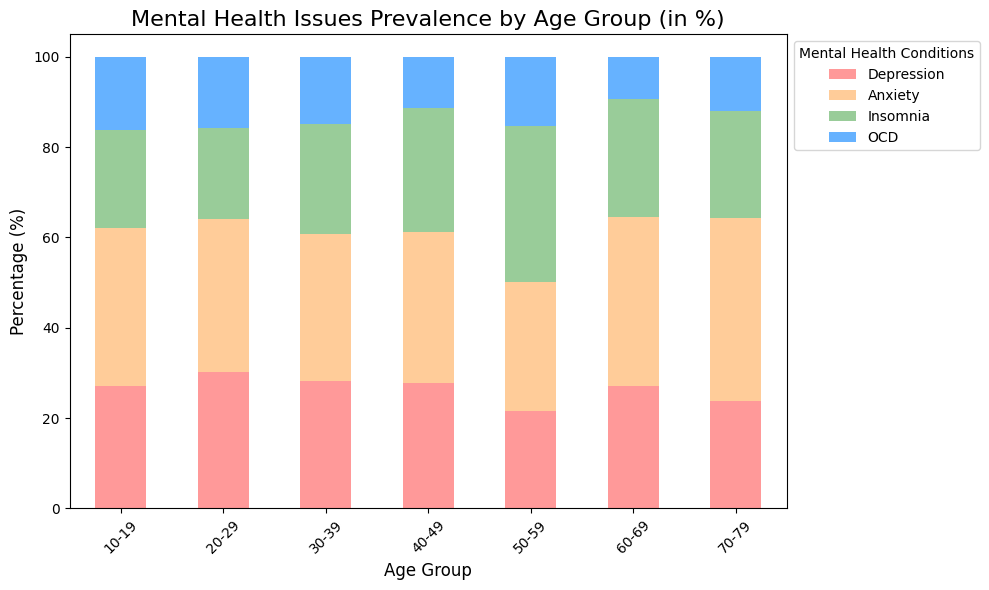

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
df = pd.read_csv('mxmh_survey_results.csv')

# Filtrar las columnas relevantes (enfermedades mentales y edad)
mental_health_cols = ['Depression', 'Anxiety', 'Insomnia', 'OCD']
df_filtered = df[['Age'] + mental_health_cols]

# Eliminar valores nulos para las columnas seleccionadas
df_filtered = df_filtered.dropna()

# Agrupar las edades en rangos
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]  # Ajusta los rangos según los datos
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_filtered['Age Group'] = pd.cut(df_filtered['Age'], bins=age_bins, labels=age_labels)

# Eliminar la columna 'Age' después de crear los grupos etarios
df_filtered = df_filtered.drop('Age', axis=1)

# Calcular el promedio de presencia de cada enfermedad mental por grupo de edad
df_grouped = df_filtered.groupby('Age Group').mean()

# Normalizar los datos para que sumen 100% en cada grupo de edad
df_grouped_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Crear un gráfico de barras apiladas con porcentajes
df_grouped_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#FFCC99', '#99CC99', '#66B2FF'])

# Añadir etiquetas y título
plt.title('Mental Health Issues Prevalence by Age Group (in %)', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Mental Health Conditions', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [23]:
def grupo_etario(x):
    if x<=20:
        return '10-20'
    elif x<=30:
        return '20-30'
    elif x<=40:
        return '30-40'
    elif x<=50:
        return '40-50'
    elif x<=60:
        return '50-60'
    else:
        return '60+'

In [25]:
df['Age_agg']=df.Age.apply(lambda x: grupo_etario(x))

In [29]:
df['n']=1

In [ ]:
#Ansiedad
round(df[df.Anxiety>3].groupby('Age_agg').sum().n*100/df.groupby('Age_agg').sum().n,1)

In [ ]:
#Depresión
round(df[df.Depression>3].groupby('Age_agg').sum().n*100/df.groupby('Age_agg').sum().n,1)

In [ ]:
#Insomnio
round(df[df.Insomnia>3].groupby('Age_agg').sum().n*100/df.groupby('Age_agg').sum().n,1)

In [ ]:
#TOC
round(df[df.OCD>3].groupby('Age_agg').sum().n*100/df.groupby('Age_agg').sum().n,1)

# Género favorito de música mas escuchado 

In [ ]:
df['Fav genre'].unique()

In [ ]:
aux= round(df.groupby('Fav genre').count()*100/len(df),1)
aux.index

In [ ]:
labels = aux.index
sizes = aux.Timestamp
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explode = (0.1, 0, 0, 0)  # resalta la primera porción

# Crear gráfico circular
plt.pie(sizes,  labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Mantiene el gráfico circular

# Mostrar gráfico
plt.show()

In [ ]:
aux= df.groupby('Fav genre').count().sort_values(by='Timestamp')
aux.head()

In [ ]:
plt.barh(aux.index,aux.Timestamp)

# ¿Sienten que la música tiene algún efecto en la salud mental?

In [ ]:
df.columns

In [ ]:
df['Music effects'].unique()

In [ ]:
df['Music effects'].isna().sum()

In [ ]:
# Filtrar los 10 géneros favoritos
top_10_genres = df['Fav genre'].value_counts().head(10).index

# Filtrar datos por los géneros favoritos
df_filtered = df[df['Fav genre'].isin(top_10_genres)]

# Crear tabla de frecuencia con los efectos de la música por género
genre_effects = pd.crosstab(df_filtered['Fav genre'], df_filtered['Music effects'])

# Graficar gráfico de barras apilado
genre_effects.plot(kind='bar', stacked=True, figsize=(10,7))

# Etiquetas y título
plt.title('Efectos de la música en los 10 géneros favoritos')
plt.xlabel('Género musical')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Music Effects')

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar los 10 géneros favoritos
top_10_genres = df['Fav genre'].value_counts().head(10).index

# Filtrar datos por los géneros favoritos
df_filtered = df[df['Fav genre'].isin(top_10_genres)]

# Crear tabla de frecuencia con los efectos de la música por género
genre_effects = pd.crosstab(df_filtered['Fav genre'], df_filtered['Music effects'])

# Convertir a porcentaje
genre_effects_percentage = genre_effects.div(genre_effects.sum(1), axis=0) * 100

# Graficar gráfico de barras apilado con porcentaje
genre_effects_percentage.plot(kind='bar', stacked=True, figsize=(10,7))

# Etiquetas y título
plt.title('Efectos de la música en los 10 géneros favoritos (Porcentaje)')
plt.xlabel('Género musical')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='Music Effects')

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Existe un patrón en común de escucha de música en aquellos encuestados que tienen/o no tienen algún problema de salud mental

In [ ]:
df.columns

In [ ]:
df[(df.Anxiety==0)&(df.Depression==0)&(df.Insomnia==0)&(df.OCD==0)]

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Cargar datos
df = pd.read_csv('mxmh_survey_results.csv')

# Filtrar datos no nulos en las columnas seleccionadas
df_filtered = df[['While working', 'Music effects']].dropna()

# Crear lista de nodos (unión única de valores de las dos columnas)
all_labels = list(pd.unique(df_filtered['While working'])) + list(pd.unique(df_filtered['Music effects']))

# Mapear los nombres a índices
label_indices = {label: i for i, label in enumerate(all_labels)}

# Crear las fuentes y destinos del diagrama (en términos de índices)
sources = df_filtered['While working'].map(label_indices)
targets = df_filtered['Music effects'].map(label_indices)

# Calcular el peso de cada conexión
link_values = df_filtered.groupby(['While working', 'Music effects']).size().reset_index(name='counts')

# Crear el diagrama de Sankey
fig = go.Figure(go.Sankey(
    node = {
        'pad': 15,
        'thickness': 20,
        'line': {'color': 'black', 'width': 0.5},
        'label': all_labels
    },
    link = {
        'source': link_values['While working'].map(label_indices),
        'target': link_values['Music effects'].map(label_indices),
        'value': link_values['counts']
    }
))

# Configurar el layout
fig.update_layout(title_text='Diagrama de Sankey: "While working" vs "Music effects"', font_size=10)
fig.show()


In [ ]:
df['Primary streaming service']['']

In [88]:
df['streaming']= df['Primary streaming service'].str.contains('I do not use a streaming service').apply(lambda x: not x).astype(str)

In [ ]:
df

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Cargar datos
#df = pd.read_csv('mxmh_survey_results.csv')

# Filtrar datos no nulos en las columnas seleccionadas
df_filtered = df[['streaming', 'Music effects']].dropna()

# Crear lista de nodos (unión única de valores de las dos columnas)
all_labels = list(pd.unique(df_filtered['streaming'])) + list(pd.unique(df_filtered['Music effects']))

# Mapear los nombres a índices
label_indices = {label: i for i, label in enumerate(all_labels)}

# Crear las fuentes y destinos del diagrama (en términos de índices)
sources = df_filtered['streaming'].map(label_indices)
targets = df_filtered['Music effects'].map(label_indices)

# Calcular el peso de cada conexión
link_values = df_filtered.groupby(['streaming', 'Music effects']).size().reset_index(name='counts')

# Crear el diagrama de Sankey
fig = go.Figure(go.Sankey(
    node = {
        'pad': 15,
        'thickness': 20,
        'line': {'color': 'black', 'width': 0.5},
        'label': all_labels
    },
    link = {
        'source': link_values['streaming'].map(label_indices),
        'target': link_values['Music effects'].map(label_indices),
        'value': link_values['counts']
    }
))

# Configurar el layout
fig.update_layout(title_text='Diagrama de Sankey: "streaming" vs "Music effects"', font_size=10)
fig.show()


# Escuchar más música influye en sentir menos ansiedad/depresión/etc

In [ ]:
df.head()

In [ ]:
df['Hours per day'].describe()

In [ ]:

from math import pi


# Agrupar por grupo etario
age_bins = [0, 18, 25, 35, 50, np.inf]  # Definir los límites de los grupos de edad
age_labels = ['<18', '18-25', '25-35', '35-50', '50+']  # Etiquetas para los grupos
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Age Group')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Age Group').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Age Group'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Age Group')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Mostrar el gráfico
plt.show()


In [ ]:

# Agrupar por grupo etario
age_bins = [0, 18, 25, 35, 50, np.inf]  # Definir los límites de los grupos de edad
age_labels = ['<18', '18-25', '25-35', '35-50', '50+']  # Etiquetas para los grupos
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Age Group')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear un gráfico de radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Age Group').values.flatten().tolist()
    values += values[:1]  # Completar el círculo

    # Crear la figura
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Age Group'][i])
    ax.fill(angles, values, alpha=0.25)

    # Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Título y leyenda
    plt.title(f'Anxiety, Depression, OCD, and Insomnia for Age Group: {df_grouped["Age Group"][i]}')
    #plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Mostrar el gráfico
    plt.show()


In [ ]:

# Agrupar por horas de escucha de música al día
hours_bins = [0, 1, 3, 5, 7, np.inf]  # Definir los límites de las horas de escucha
hours_labels = ['0-1 hrs', '1-3 hrs', '3-5 hrs', '5-7 hrs', '7+ hrs']  # Etiquetas para los grupos
df['Hours Group'] = pd.cut(df['Hours per day'], bins=hours_bins, labels=hours_labels)

# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo de horas
df_grouped = df.groupby('Hours Group')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear un gráfico de radar para cada grupo de horas
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Hours Group').values.flatten().tolist()
    values += values[:1]  # Completar el círculo

    # Crear la figura
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Hours Group'][i])
    ax.fill(angles, values, alpha=0.25)

    # Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Título y leyenda
    plt.title(f'Anxiety, Depression, OCD, and Insomnia for Music Listening Hours: {df_grouped["Hours Group"][i]}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Mostrar el gráfico
    plt.show()


In [ ]:


# Cargar datos
df = pd.read_csv('mxmh_survey_results.csv')

# Agrupar por horas de escucha de música al día
hours_bins = [0, 3, 6, 10, 15, np.inf]  # Definir los límites de las horas de escucha
hours_labels = ['0-3 hrs', '4-6 hrs', '7-10 hrs', '11-15 hrs', '16+ hrs']  # Etiquetas para los grupos
df['Hours Group'] = pd.cut(df['Hours per day'], bins=hours_bins, labels=hours_labels)

# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo de horas
df_grouped = df.groupby('Hours Group')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear una figura con subgráficas
fig, axs = plt.subplots(1, len(df_grouped), figsize=(25, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo de horas
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Hours Group').values.flatten().tolist()
    values += values[:1]  # Completar el círculo

    axs[i].plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Hours Group'][i])
    axs[i].fill(angles, values, alpha=0.25)

    # Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(categories)
    axs[i].set_ylim(0, 10)
    # Título de cada gráfico
    axs[i].set_title(f'Hours Group: {df_grouped["Hours Group"][i]}')

# Ajustar la presentación
plt.tight_layout()
plt.show()


# ¿Cómo se relaciona los BPM de los géneros favoritos de los entrevistados con su salud mental?

In [ ]:
df.columns

In [ ]:
df.BPM.max()

In [ ]:
df.BPM.mean()

In [ ]:
df.BPM.corr(df.Anxiety)

In [ ]:
df.BPM.corr(df.Depression)

In [ ]:
music_effects_per_genre = df.groupby('Fav genre')['Music effects'].value_counts(normalize=True).unstack() * 100
sns.heatmap(music_effects_per_genre, annot=True, fmt=".2f", cmap="RdPu")
plt.title("Music Effects of Genre (in %)")
plt.xlabel("Genre")
plt.ylabel("Music Effects")
plt.show()

In [121]:
def BPM(x):
    if x < 60:
        return 'Slow music (<60 BPM)'
    elif x < 90:
        return 'Moderate music (60-90 BPM)'
    elif x < 120:
        return 'Energetic music (90-120 BPM)'
    elif x < 140:
        return 'Active music (120-140 BPM)'
    else:
        return 'Faster music (>140 BPM)'

In [122]:
df['Tipo de Musica']=df.BPM.apply(BPM)

In [ ]:
df.groupby(['Tipo de Musica']).count()

In [ ]:
music_effects_per_bpm = df.groupby('Tipo de Musica')['Music effects'].value_counts(normalize=True).unstack() * 100
sns.heatmap(music_effects_per_bpm, annot=True, fmt=".2f", cmap="RdPu")
plt.title("Music Effects of type (in %)")
plt.xlabel("Genre")
plt.ylabel("Music Effects")
plt.show()

# Relación entre los BPM del genero favorito y el insomnio

In [ ]:
df.columns

In [ ]:
music_effects_per_bpm = df.groupby('Tipo de Musica')['Insomnia'].value_counts(normalize=True).unstack() * 100
sns.heatmap(music_effects_per_bpm, annot=True, fmt=".0f", cmap="RdPu")
plt.title("Music Effects of type (in %)")
plt.xlabel("Insomnia")
plt.ylabel("Music Effects")
plt.show()

In [ ]:
music_effects_per_bpm = df.groupby('Tipo de Musica')['Anxiety'].value_counts(normalize=True).unstack() * 100
sns.heatmap(music_effects_per_bpm, annot=True, fmt=".0f", cmap="RdPu")
plt.title("Music Effects of type (in %)")
plt.xlabel("Anxiety")
plt.ylabel("Music Effects")
plt.show()

In [ ]:
df.columns

In [ ]:
# ¿Cómo influye la frecuencia de escucha de diferentes géneros musicales en distintos aspectos de la salud mental? como relajación, motivación, o ansiedad

In [ ]:
[ 'Frequency [Classical]','Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Hours Group', 'Tipo de Musica']

In [ ]:
df['Frequency [Classical]'].unique()

In [ ]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Country]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Country]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Country]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Country]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


In [ ]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [EDM]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [EDM]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [EDM]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [EDM]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


In [ ]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Folk]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Folk]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Folk]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Folk]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


In [ ]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Gospel]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Gospel]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Gospel]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Gospel]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


In [ ]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Hip hop]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Hip hop]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Hip hop]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Hip hop]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


In [ ]:

from math import pi




# Calcular promedios de las escalas (Ansiedad, Depresión, Insomnio, OCD) por grupo etario
df_grouped = df.groupby('Frequency [Hip hop]')[['Anxiety', 'Depression', 'OCD', 'Insomnia']].mean().reset_index()

# Número de variables
categories = list(df_grouped)[1:]  # Las escalas: 'Anxiety', 'Depression', 'OCD', 'Insomnia'
N = len(categories)

# Ángulos para cada eje en el gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar radar para cada grupo etario
for i in range(len(df_grouped)):
    values = df_grouped.loc[i].drop('Frequency [Hip hop]').values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_grouped['Frequency [Hip hop]'][i])
    ax.fill(angles, values, alpha=0.25)

# Etiquetas de los ejes (Ansiedad, Depresión, OCD, Insomnio)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Título y leyenda
plt.title('Anxiety, Depression, OCD, and Insomnia by Frequency [Hip hop]')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.99))

# Mostrar el gráfico
plt.show()


In [ ]:


# Cargar los datos del archivo CSV (asegúrate de tener el dataset en el directorio adecuado)
df = pd.read_csv('mxmh_survey_results.csv')

# Definir las columnas de frecuencias de géneros musicales
frequencies_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
                    'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
                    'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

# Definir las columnas de resultados de salud mental
mental_health_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Convertir las categorías de frecuencia en valores numéricos
frequency_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}

# Aplicar el mapeo a las columnas de frecuencias
for col in frequencies_cols:
    df[col] = df[col].map(frequency_map)

# Calcular las correlaciones entre las frecuencias de géneros musicales y los resultados de salud mental
correlations = df[frequencies_cols + mental_health_cols].corr()

# Filtrar solo las correlaciones de los géneros con las condiciones de salud mental
correlations_health = correlations.loc[frequencies_cols, mental_health_cols]

# Crear un heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlations_health, annot=True, cmap='PuRd', center=0, linewidths=.5)

# Configurar etiquetas y título del gráfico
plt.title('Correlations between Music Genre Frequency and Mental Health Conditions', fontsize=16)
plt.xlabel('Mental Health Conditions', fontsize=12)
plt.ylabel('Music Genres', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()